In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

# Part A

In [2]:
# Importing DataSets
tele1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TelcomCustomer-Churn_1.csv')
tele2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TelcomCustomer-Churn_2.csv')

In [3]:
tele1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [4]:
print(f'{tele1.shape}\n{tele2.shape}')

(7043, 10)
(7043, 12)


In [5]:
# Merging tele1 and tele2 on customerID
data = pd.merge(tele1, tele2, on='customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Converting TotalCharges into float
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'].isna().sum()

11

In [8]:
data = data.dropna(axis=0)

In [9]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'].dtype

<ipython-input-9-dfba3c8ea13d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'] = data['TotalCharges'].astype(float)


dtype('float64')

In [10]:
# Converting all object columns in category
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = data[col].astype('category')

<ipython-input-10-525707dd5b97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype('category')


In [11]:
data.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

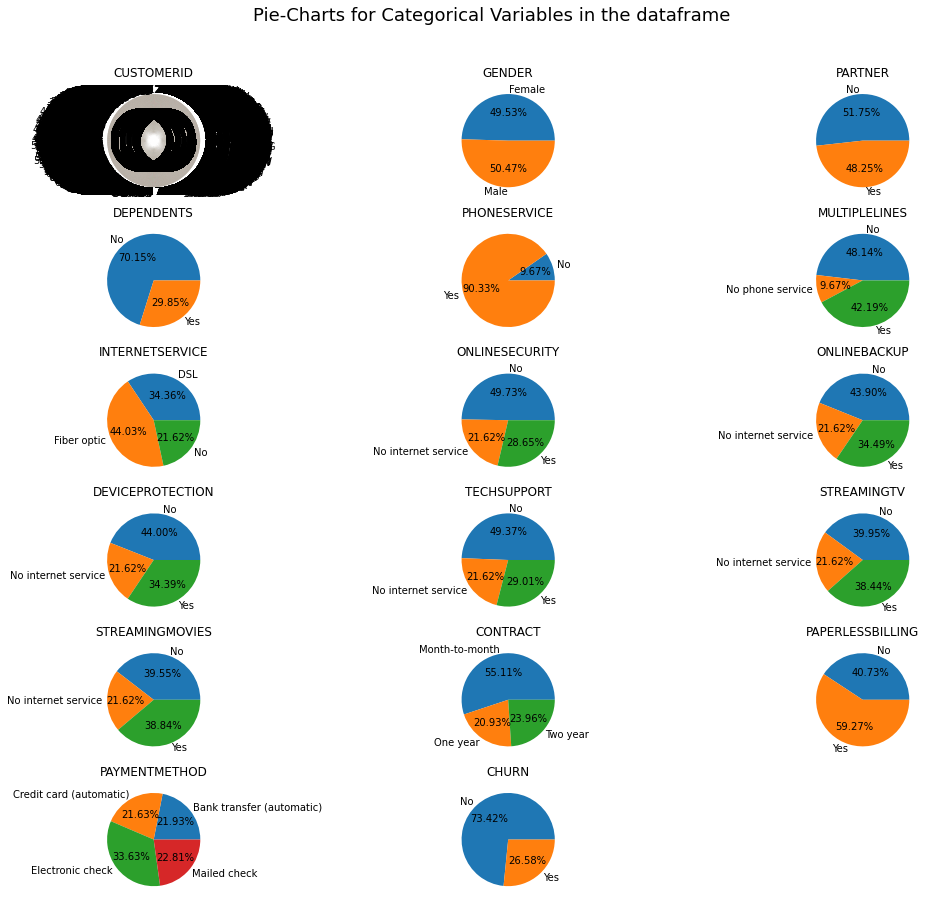

In [12]:
def pie_charts_for_CategoricalVar(df_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df_pie[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(18, 15))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df_pie.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()
pie_charts_for_CategoricalVar(data,3)

> Around 90% of people uses some kind of phone Services

> Majority of people willing to pay month-to-month instead of paying anually for services like internet , moviesstreamings etc.

> Only 22% people use credit card as a payment method.

> Data is Imbalanced as 26% customers churned and 73% did not.

In [13]:
a = []
for col in data.columns:
  if data[col].dtype == 'category':
    a.append(col)
print(a)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [14]:
for col in a:
  print(f'{(col)} : {data[col].unique()}\n')

customerID : ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', ..., '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK']
Length: 7032
Categories (7032, object): ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', ..., '9992-RRAMN',
                            '9992-UJOEL', '9993-LHIEB', '9995-HOTOH']

gender : ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Partner : ['Yes', 'No']
Categories (2, object): ['No', 'Yes']

Dependents : ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

PhoneService : ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

MultipleLines : ['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

InternetService : ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']

OnlineSecurity : ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

OnlineBackup : ['Yes', 'No', 'No internet service']
Categor

In [38]:
def pre_processing(df):
  df = df.copy()

  # Converting 'No phone service' and 'No internet service' to 'NO'
  df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
  df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')

  # Converting nominal columns to numeric
  nom = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
  for col in nom:
    df[col] = df[col].replace({'No' : 0 , "Yes" : 1})
  le = LabelEncoder()
  df['Churn']=le.fit_transform(df['Churn'])
  df['gender'] = df['gender'].replace({'Female' : 1 , 'Male' : 2})

  # One Hot encoding
  onehotcolumns = ['InternetService', 'Contract','PaymentMethod']
  for cols in onehotcolumns:
    dummies = pd.get_dummies(df[cols],prefix=cols)
    df = pd.concat([df,dummies], axis=1)
    df = df.drop(cols,axis=1)
  df = df.drop('customerID', axis=1)
  
  # Splitting data
  X = df.drop('Churn', axis=1)
  Y = df['Churn']

  # Training & Testing Data
  x_train , x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.20, random_state = 1, shuffle=True)

  # Normalize/Standardize the data with the best suitable approach
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = pd.DataFrame(scaler.fit_transform(x_train), index =  x_train.index ,  columns = x_train.columns)
  x_test = pd.DataFrame(scaler.fit_transform(x_test), index =  x_test.index ,  columns = x_test.columns)
  
  return x_train , x_test, y_train, y_test

In [39]:
x_train , x_test, y_train, y_test = pre_processing(data)

# Training XGBOOST Model With Default Parameters


In [40]:
accuracy= []
recall =[]
roc_auc= []
precision = []

xgbc_base = XGBClassifier(random_state=0)

xgbc_base.fit(x_train, y_train)
y_pred = xgbc_base.predict(x_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_Default']
result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df

,Accuracy,Recall,Roc_Auc,Precision
XGBoost_Default,0.8024,0.5383,0.7168,0.6438


> With default parameters Recall is around 54% and Precision is 64%

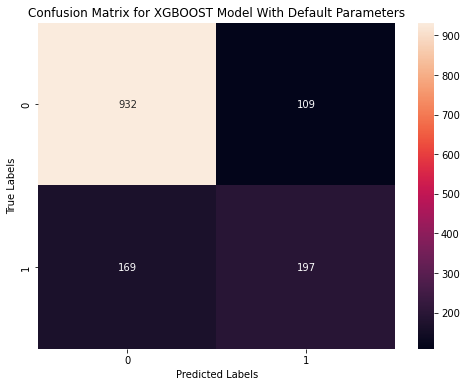

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
cm_df = pd.DataFrame(cm, index = [i for i in ['0','1']], columns = [i for i in ['0','1']])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix for XGBOOST Model With Default Parameters')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> 169 times predicted incorectly customers will not churn but they actually churned.

> 109 time predicted incorrectly that customer will churn but they actually did not.

# XGBoost (with adjusted Scale_Pos_Weight = 3) 

In [42]:
accuracy= []
recall =[]
roc_auc= []
precision = []

xgbc_2 = XGBClassifier(random_state=0, scale_pos_weight=3)

xgbc_2.fit(x_train, y_train)
y_pred = xgbc_2.predict(x_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost(with adjusted Scale_Pos_Weight = 3)']
result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df

,Accuracy,Recall,Roc_Auc,Precision
XGBoost(with adjusted Scale_Pos_Weight = 3),0.7363,0.8443,0.7713,0.496


> Acurracy of model decreases but Recall and Roc_Auc Score increased from previous model.

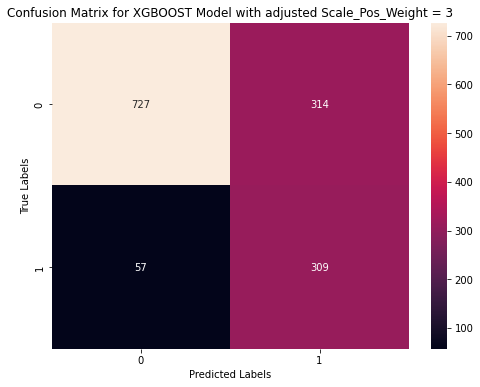

In [43]:
# Confusion Matrix 2
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
cm_df = pd.DataFrame(cm, index = [i for i in ['0','1']], columns = [i for i in ['0','1']])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix for XGBOOST Model with adjusted Scale_Pos_Weight = 3')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> 57 times predicted incorectly customers will not churn but they actually churned.

> 314 time predicted incorrectly that customer will churn but they actually did not.


#XGBoost (with adjusted Scale_Pos_Weight = 5)

In [44]:
accuracy= []
recall =[]
roc_auc= []
precision = []

xgbc_3 = XGBClassifier(random_state=0, scale_pos_weight=5)

xgbc_3.fit(x_train, y_train)
y_pred = xgbc_3.predict(x_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_(with adjusted Scale_Pos_Weight = 5)']
result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df

,Accuracy,Recall,Roc_Auc,Precision
XGBoost_(with adjusted Scale_Pos_Weight = 5),0.6908,0.9262,0.7671,0.4538


> Recall and Roc_AUC increases but acuracy and precision score decreases.

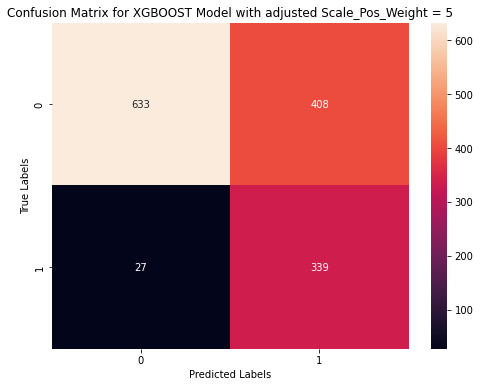

In [45]:
# Confusion Matrix 3
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
cm_df = pd.DataFrame(cm, index = [i for i in ['0','1']], columns = [i for i in ['0','1']])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix for XGBOOST Model with adjusted Scale_Pos_Weight = 5')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> High amount of error with 408 times predicted customer will not churn but they actually churned and only 27 times predicted customer will churn but actually did not.

#Summary Plot- XGBoost (with adjusted Scale_Pos_Weight = 5)

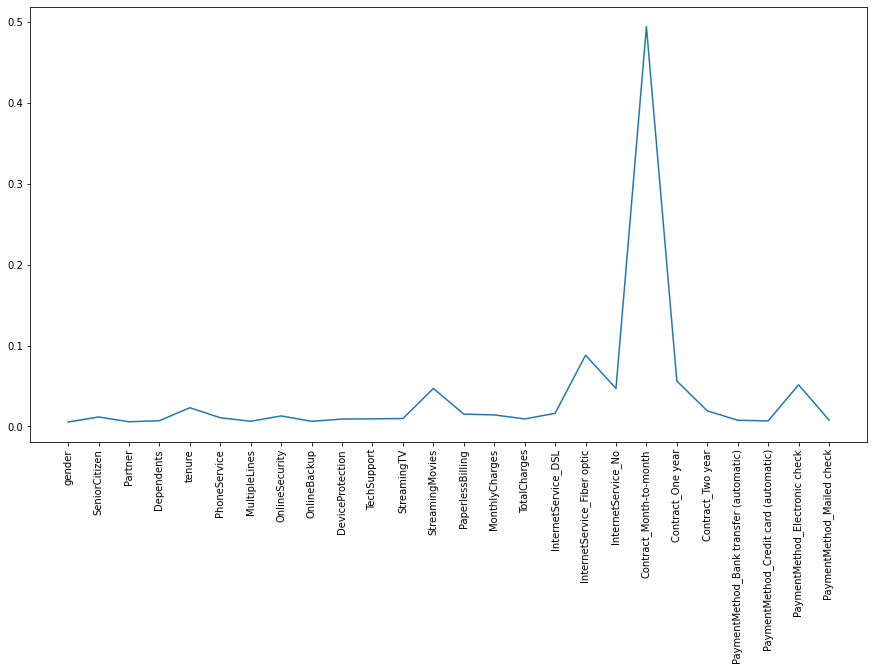

In [46]:
feature_importance = pd.DataFrame(xgbc_3.feature_importances_,columns = ['IMP'], index = x_train.columns )
plt.figure(figsize = (15,8))
plt.plot(feature_importance)
plt.xticks(rotation = 90)
plt.show()

# Part B

> **Here we are using tele1 as a dataset and gender as a target variable for this ML workflow.**


In [24]:
Tar_var = input('Enter name of target variable : ') # Enter the target variable here

Enter name of target variable : gender


# Preprocessing


In [25]:
def pre_processing(df):
  df = df.copy()
  # Converting all the object columns to category
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].astype('category')
  # replacing nan from int and float columns with median if less than 10% of the data
  numeric_columns = df.dtypes[df.dtypes == 'int64'].index.values.tolist() # Saving all numeric columns into a list
  for col in numeric_columns:
    x = df[col].isna().sum()
    if  x < len((df[col]))/10:
      df[col] = df[col].fillna(df[col].median()) # repacing all nan with medians
    else : pass
  float_columns = df.dtypes[df.dtypes == 'float'].index.values.tolist() # saving all float columns into a list
  for col in float_columns:
    x = df[col].isna().sum()
    if  x < len((df[col]))/10:
      df[col] = df[col].fillna(df[col].median()) # repacing all nan with medians
    else : pass
  df = df.dropna() # dropping rest of the nan values in category columns if exists
  df = df.reset_index()
  for col in df.columns:
    if len(df[col].unique()) ==2 : # label Encoding Binary columns
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])
    else : pass
    if len(df[col].unique()) > 2 and len(df[col].unique()) <= 10:
      dummies = pd.get_dummies(df[col], prefix = col)
      df = pd.concat([df,dummies], axis = 1) # One hot encoding nominal columns
      df = df.drop(col,axis=1)
    else : pass
    cat_cols = df.dtypes[df.dtypes == 'category'].index.values.tolist()
  for col in cat_cols :
    if len(df[col].unique()) > 10 : # Removing useless columns 
      df = df.drop(col, axis=1)
    else : pass
  # Splitting the data in X and Y
  X = df.drop(Tar_var, axis = 1)
  Y = df[Tar_var]
  # Training data
  x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, shuffle = True, random_state = 1)
  return x_train, x_test, y_train, y_test


In [26]:
x_train, x_test, y_train, y_test = pre_processing(tele1)

In [27]:
x_train.head()

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
5925,5925,0,0,0,20,1,0,0,1,1,0,0,1,0,0
4395,4395,0,1,1,69,1,0,0,1,0,1,0,1,0,0
1579,1579,1,1,0,12,1,1,0,0,0,1,0,1,0,0
1040,1040,1,0,0,14,1,1,0,0,0,1,0,1,0,0
1074,1074,0,0,0,1,1,1,0,0,0,0,1,0,1,0


> we can see our pre_processing is working fine

> Binary columns are encoded using label encoder and nominal columns are encoded using one hot encoding.

> Useless columns like customerID removed automatically and Data saved in x_train, x_test , y_train and y_test

# Data modeling


In [62]:
def modeling(x_train,x_test,y_train,y_test):
  models = {
      'SVM'           : svm.SVC(),
      'KNN'           : KNeighborsClassifier(n_neighbors = 6, weights = 'distance'),
      'Decision Tree' : DecisionTreeClassifier(max_depth = 3),
      'Random Forest' : RandomForestClassifier(max_depth = 5)
  }
  for name, model in models.items():
    model.fit(x_train, y_train)
    print(f'{name} : Trained!')
    y_pred = model.predict(x_test)
    print(f'Training Set Accuracy of {name} : {round(model.score(x_train,y_train),3)*100}%')
    print(f'Test Set Accuracy of {name} : {round(model.score(x_test,y_test),3)*100}%\n')
    cm = confusion_matrix(y_test,y_pred,labels=[0,1])
    cm_df = pd.DataFrame(cm, index = [i for i in ['women' , 'men']],columns = [i for i in ['women','men']])
    sns.heatmap(cm_df,annot = True,fmt = 'g')
    plt.title(f'Confusion Matrix : {name}')
    plt.show()
    print(f'\n------------------------------------------------------\n')


SVM : Trained!
Training Set Accuracy of SVM : 81.69999999999999%
Test Set Accuracy of SVM : 79.5%



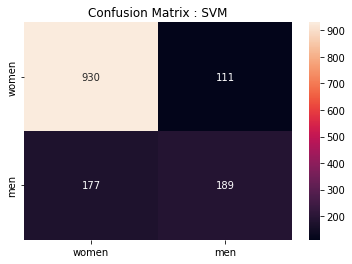


------------------------------------------------------

KNN : Trained!
Training Set Accuracy of KNN : 99.8%
Test Set Accuracy of KNN : 75.0%



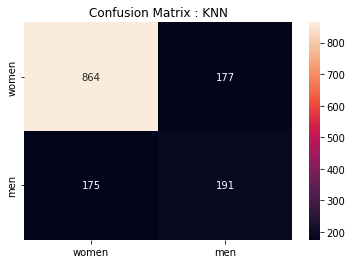


------------------------------------------------------

Decision Tree : Trained!
Training Set Accuracy of Decision Tree : 79.10000000000001%
Test Set Accuracy of Decision Tree : 79.0%



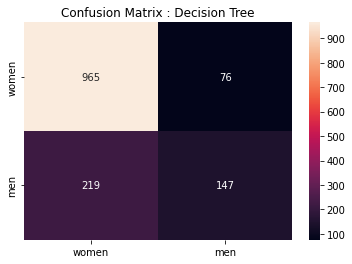


------------------------------------------------------

Random Forest : Trained!
Training Set Accuracy of Random Forest : 80.80000000000001%
Test Set Accuracy of Random Forest : 79.60000000000001%



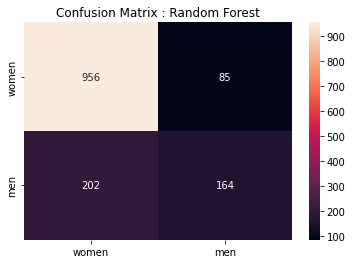


------------------------------------------------------



In [65]:
Final_models = modeling(x_train,x_test,y_train,y_test)
Final_models

# Saving Models to Pikle file


In [66]:
with open('ML_FLOW_Model','wb') as f:
  pickle.dump(Final_models,f)

In [68]:
with open('ML_FLOW_Model','rb') as f:
  mp = pickle.load(f)